# IRMAS Splitting

This notebook creates a train/test split of the IRMAS training set.

We do this, rather than use the original IRMAS testing set to maintain distributional equivalence.
The original IRMAS testing set differs from the training set in a few ways, notably by variable-duration and multi-labeled examples.

In [1]:
import h5py
import pandas as pd
from sklearn.model_selection import GroupShuffleSplit, StratifiedGroupKFold
from sklearn.preprocessing import LabelEncoder
import re

In [2]:
data = h5py.File('embeddings.h5', mode='r')

In [3]:
file_names = list(data['irmas/openl3/keys'][()])

In [4]:
prefixes = [_[:3] for _ in file_names]

In [5]:
file_names[:10]

[
    '001__[gel][dru][pop_roc]0829__1',
    '001__[gel][dru][pop_roc]0829__1',
    '001__[gel][dru][pop_roc]0829__1',
    '001__[gel][dru][pop_roc]0829__1',
    '001__[gel][dru][pop_roc]0829__1',
    '001__[gel][dru][pop_roc]0829__1',
    '001__[gel][dru][pop_roc]0829__1',
    '001__[gel][dru][pop_roc]0829__1',
    '001__[gel][dru][pop_roc]0829__1',
    '001__[gel][dru][pop_roc]0829__1'
]

In [6]:
matcher = re.compile(r'.*?\[(?P<class>\w+)\].*')

In [7]:
def classname(x):
    res = re.match(matcher, x)
    return res.groups()[0]

In [8]:
labels = [classname(_) for _ in file_names]
classes = set(labels)

In [9]:
encoder = LabelEncoder()
Y = encoder.fit_transform(labels)

In [10]:
splitter = StratifiedGroupKFold(n_splits=4, random_state=20220419, shuffle=True)

In [11]:
train_ids, test_ids = next(splitter.split(file_names, y=Y, groups=prefixes))

In [12]:
len(train_ids), len(test_ids)

(136000, 31625)

In [14]:
train_ids[:10]

array([450, 451, 452, 453, 454, 455, 456, 457, 458, 459])

In [15]:
all_files = pd.Series(file_names)

In [16]:
train_files = all_files[train_ids]

In [17]:
test_files = all_files[test_ids]

<AxesSubplot:>

<Figure size 432x288 with 1 Axes>

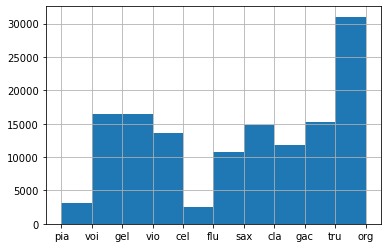

In [18]:
pd.Series(encoder.inverse_transform(Y[train_ids])).hist()

<AxesSubplot:>

<Figure size 432x288 with 1 Axes>

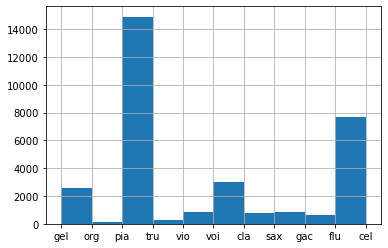

In [19]:
pd.Series(encoder.inverse_transform(Y[test_ids])).hist()

In [20]:
train_files

450       002__[pia][nod][cla]1382__1
451       002__[pia][nod][cla]1382__1
452       002__[pia][nod][cla]1382__1
453       002__[pia][nod][cla]1382__1
454       002__[pia][nod][cla]1382__1
                     ...             
167620          [voi][pop_roc]2548__3
167621          [voi][pop_roc]2548__3
167622          [voi][pop_roc]2548__3
167623          [voi][pop_roc]2548__3
167624          [voi][pop_roc]2548__3
Length: 136000, dtype: object

In [21]:
test_files

0         001__[gel][dru][pop_roc]0829__1
1         001__[gel][dru][pop_roc]0829__1
2         001__[gel][dru][pop_roc]0829__1
3         001__[gel][dru][pop_roc]0829__1
4         001__[gel][dru][pop_roc]0829__1
                       ...               
125545              [pia][pop_roc]1546__2
125546              [pia][pop_roc]1546__2
125547              [pia][pop_roc]1546__2
125548              [pia][pop_roc]1546__2
125549              [pia][pop_roc]1546__2
Length: 31625, dtype: object

In [22]:
len(train_files), len(test_files)

(136000, 31625)

In [23]:
train_files.to_csv('irmas_train.csv', header=None, index=None)

In [24]:
test_files.to_csv('irmas_test.csv', header=None, index=None)

---
First pass, class-unconditional splits, don't use.

In [64]:
splitter = GroupShuffleSplit(n_splits=1, random_state=20220419, test_size=0.25)

In [65]:
train_ids, test_ids = next(splitter.split(file_names, groups=prefixes))

In [66]:
all_files = pd.Series(file_names)

In [67]:
train_files = all_files[train_ids]

In [68]:
test_files = all_files[test_ids]

In [69]:
train_files

600       003__[voi][dru][cou_fol]2431__1
601       003__[voi][dru][cou_fol]2431__1
602       003__[voi][dru][cou_fol]2431__1
603       003__[voi][dru][cou_fol]2431__1
604       003__[voi][dru][cou_fol]2431__1
                       ...               
167620              [voi][pop_roc]2548__3
167621              [voi][pop_roc]2548__3
167622              [voi][pop_roc]2548__3
167623              [voi][pop_roc]2548__3
167624              [voi][pop_roc]2548__3
Length: 97750, dtype: object

In [70]:
test_files

0         001__[gel][dru][pop_roc]0829__1
1         001__[gel][dru][pop_roc]0829__1
2         001__[gel][dru][pop_roc]0829__1
3         001__[gel][dru][pop_roc]0829__1
4         001__[gel][dru][pop_roc]0829__1
                       ...               
150445              [tru][pop_roc]2078__3
150446              [tru][pop_roc]2078__3
150447              [tru][pop_roc]2078__3
150448              [tru][pop_roc]2078__3
150449              [tru][pop_roc]2078__3
Length: 69875, dtype: object

In [71]:
len(train_files) + len(test_files)

167625

In [39]:
#train_files.to_csv('irmas_train.csv', header=None, index=None)

In [40]:
#test_files.to_csv('irmas_test.csv', header=None, index=None)